In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from bokeh.plotting import figure, show


In [2]:
urnas = pd.read_csv('urnass.csv')

uso dos modelos de urna

In [3]:
div_mod = urnas.groupby(by='MODELO').count()['id']
pd.DataFrame([div_mod,div_mod/div_mod.sum()],index=['qtd','p']).transpose()

,qtd,p
MODELO,,
UE2009,48245.0,0.102218
UE2010,93757.0,0.198645
UE2011,26889.0,0.056970
UE2013,24672.0,0.052273
UE2015,85729.0,0.181636
UE2020,192691.0,0.408258


Quantidade de seçoes por Estado e por Modelo em que o votos foram zerados pro Bozo

In [4]:
variavel='votos_bozo'
qtd_bozo_nulo=urnas[urnas[variavel]==0.].groupby(by=['MODELO','SG_UF']).count().pivot_table(index=['SG_UF'],values=['id'],columns=['MODELO']).fillna(0)
qtd_bozo_nulo['total_zeras']=qtd_bozo_nulo.sum(axis=1)
qtd_bozo_nulo['total']=urnas.groupby(by=['SG_UF']).count()['id']
qtd_bozo_nulo['porc_zeradas']=qtd_bozo_nulo['total_zeras']/qtd_bozo_nulo['total']*100
qtd_bozo_nulo

id                                    total_zeras   total  \
MODELO UE2009 UE2010 UE2011 UE2013 UE2015 UE2020                       
SG_UF                                                                  
AC        0.0    2.0    0.0    0.0    0.0    0.0         2.0    2124   
AM        1.0    6.0    1.0    4.0   11.0    0.0        23.0    7453   
BA        5.0    3.0    8.0    0.0    2.0    1.0        19.0   34424   
CE        0.0    4.0    0.0    0.0    4.0    0.0         8.0   22796   
MA        7.0   13.0    2.0    8.0   15.0    2.0        47.0   16423   
MG        1.0    4.0    0.0    3.0    0.0    1.0         9.0   49981   
MS        0.0    1.0    0.0    0.0    0.0    0.0         1.0    6912   
MT        3.0    0.0    0.0    0.0    2.0    0.0         5.0    7652   
PA        1.0    1.0    1.0    0.0    3.0    2.0         8.0   18226   
PI        0.0    2.0    0.0    0.0    3.0    2.0         7.0    8963   
PR        0.0    1.0    0.0    0.0    0.0    0.0         1.0   25721   
RR        0.0    0.0    0.0    0.0    2.0    0.0         2.0    1268   
RS        0.0    1.0    0.0    0.0    0.0    1.0         2.0   27201   
SC        0.0    0.0    0.0    0.0    1.0    0.0         1.0   16242   
SE        0.0    0.0    0.0    0.0    0.0    1.0         1.0    5498   
SP        0.0    0.0    0.0    0.0    4.0    0.0         4.0  101073   
TO        0.0    0.0    0.0    0.0    0.0    1.0         1.0    3957   

       porc_zeradas  
MODELO               
SG_UF                
AC         0.094162  
AM         0.308601  
BA         0.055194  
CE         0.035094  
MA         0.286184  
MG         0.018007  
MS         0.014468  
MT         0.065342  
PA         0.043893  
PI         0.078099  
PR         0.003888  
RR         0.157729  
RS         0.007353  
SC         0.006157  
SE         0.018188  
SP         0.003958  
TO         0.025272

Quantidade de seçoes por Estado e por modelo em que o votos foram zerados pro LULA

In [5]:
variavel='votos_lula'
qtd_bozo_nulo=urnas[urnas[variavel]==0.].groupby(by=['MODELO','SG_UF']).count().pivot_table(index=['SG_UF'],values=['id'],columns=['MODELO']).fillna(0)
qtd_bozo_nulo['total_zeras']=qtd_bozo_nulo.sum(axis=1)
qtd_bozo_nulo['total']=urnas.groupby(by=['SG_UF']).count()['id']
qtd_bozo_nulo['porc_zeradas']=qtd_bozo_nulo['total_zeras']/qtd_bozo_nulo['total']*100
qtd_bozo_nulo

id               total_zeras  total porc_zeradas
MODELO UE2009 UE2010 UE2015                                
SG_UF                                                      
PA        0.0    0.0    1.0         1.0  18226     0.005487
RS        0.0    1.0    0.0         1.0  27201     0.003676
ZZ        2.0    0.0    0.0         2.0    984     0.203252

Votos Bozo X Votos LULA nas seções que usaram o modelo UE2020

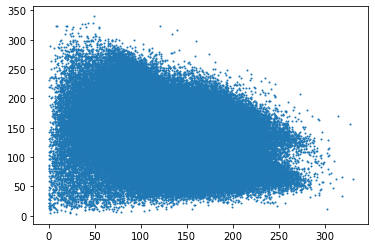

In [6]:
p1 = figure(width=400, height=400)
x = urnas[urnas['MODELO']=='UE2020']['votos_bozo']
y = urnas[urnas['MODELO']=='UE2020']['votos_lula']
plt.scatter(x,y,s=1)
p1.circle(x, y, size=1, color="navy", alpha=0.5)
show(p1)


Votos Bozo X Votos LULA nas seções que NÃO usaram o modelo UE2020

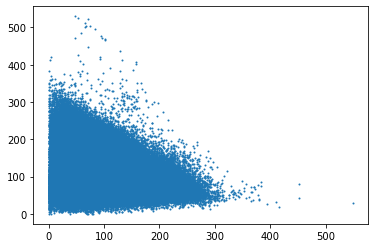

In [7]:
x = urnas[urnas['MODELO']!='UE2020']['votos_bozo']
y = urnas[urnas['MODELO']!='UE2020']['votos_lula']
p2 = figure(width=400, height=400)
p2.circle(x, y, size=1, color="navy", alpha=0.5)
show(p2)
plt.scatter(x,y,s=1)